In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [21]:
def draw_heatmap(dataframe: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        dataframe.corr(),
        xticklabels=dataframe.corr().columns,
        yticklabels=dataframe.corr().columns,
        annot=True,
    )

In [22]:
df = pd.read_csv("spaceship_titanic.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [23]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [24]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [25]:
cat_columns = ["HomePlanet", "Cabin", "Destination"]

In [26]:
for column_name in cat_columns:
    frequent_pl = df[column_name].value_counts().head(1).index[0]
    df[column_name].fillna(frequent_pl, inplace=True)

In [27]:
for name in [
    "Age",
    "CryoSleep",
    "VIP",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
]:
    df[name].fillna(df[name].median(), inplace=True)

In [28]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [29]:
hashmap_cat = {}
for col in cat_columns:
    for i, val in enumerate(pd.unique(df[col])):
        hashmap_cat[val] = i

# print(hashmap_cat)

for col in cat_columns:
    for val in pd.unique(df[col]):
        df[col].replace(val, hashmap_cat[val], inplace=True)

<Axes: >

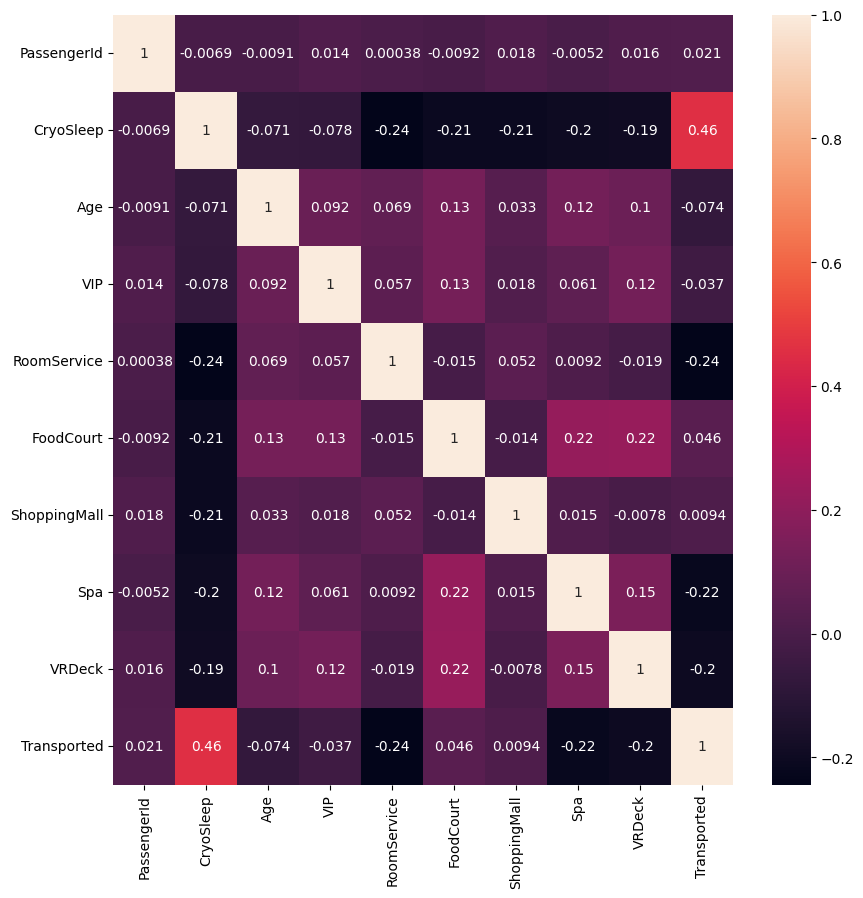

In [30]:
sdf = df.drop(columns=["Name"] + cat_columns, axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(
    sdf.corr(),
    xticklabels=sdf.corr().columns,
    yticklabels=sdf.corr().columns,
    annot=True,
)

In [31]:
sdf.drop(
    columns=["PassengerId", "ShoppingMall", "FoodCourt", "Age", "VIP"], inplace=True
)
sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported
0,False,0.0,0.0,0.0,False
1,False,109.0,549.0,44.0,True
2,False,43.0,6715.0,49.0,False
3,False,0.0,3329.0,193.0,False
4,False,303.0,565.0,2.0,True
...,...,...,...,...,...
8688,False,0.0,1643.0,74.0,False
8689,True,0.0,0.0,0.0,False
8690,False,0.0,1.0,0.0,True
8691,False,0.0,353.0,3235.0,False


<Axes: >

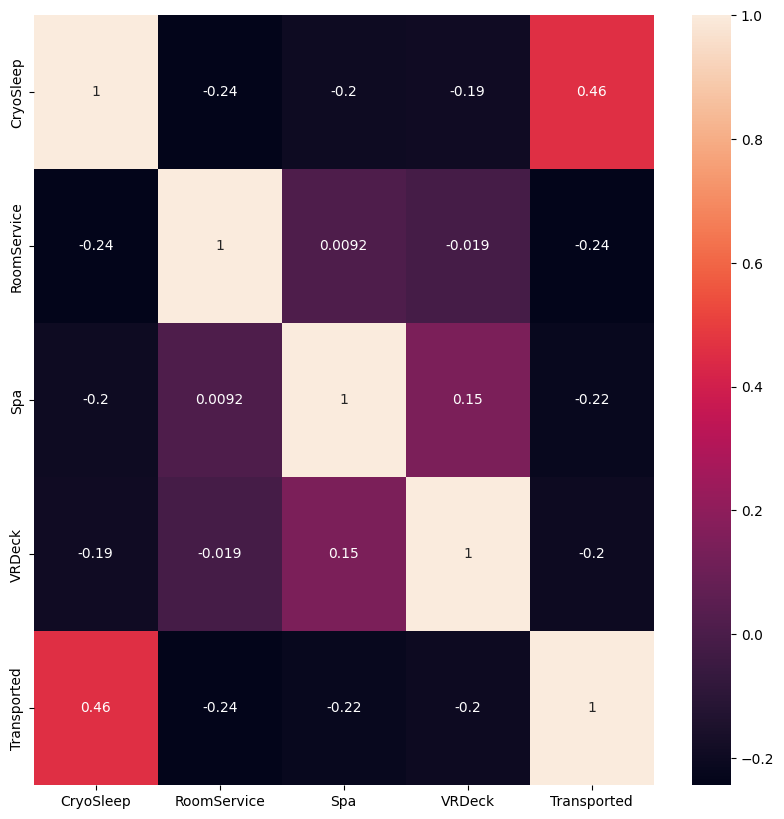

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    sdf.corr(),
    xticklabels=sdf.corr().columns,
    yticklabels=sdf.corr().columns,
    annot=True,
)

## Отделение целевой функции

In [ ]:
split_sdf = sdf.drop(columns=["Transported"])
split_sdf

,CryoSleep,RoomService,Spa,VRDeck
0,False,0.0,0.0,0.0
1,False,109.0,549.0,44.0
2,False,43.0,6715.0,49.0
3,False,0.0,3329.0,193.0
4,False,303.0,565.0,2.0
...,...,...,...,...
8688,False,0.0,1643.0,74.0
8689,True,0.0,0.0,0.0
8690,False,0.0,1.0,0.0
8691,False,0.0,353.0,3235.0


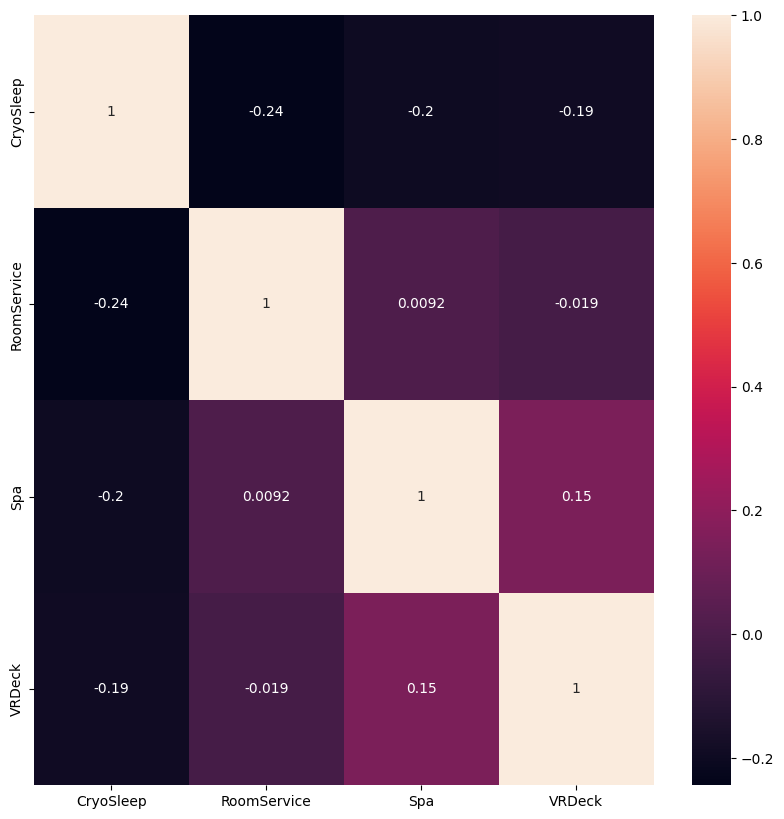

In [34]:
draw_heatmap(split_sdf)

## Нормализация

In [35]:
for f in sdf.columns:
    sdf[f] = sdf[f].map(lambda x: (x - min(sdf[f])) / (max(sdf[f]) - min(sdf[f])))

sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported
0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.007608,0.024500,0.001823,1.0
2,0.0,0.003001,0.299670,0.002030,0.0
3,0.0,0.000000,0.148563,0.007997,0.0
4,0.0,0.021149,0.025214,0.000083,1.0
...,...,...,...,...,...
8688,0.0,0.000000,0.073322,0.003066,0.0
8689,1.0,0.000000,0.000000,0.000000,0.0
8690,0.0,0.000000,0.000045,0.000000,1.0
8691,0.0,0.000000,0.015753,0.134049,0.0


## Тренировка

In [38]:
from sklearn.model_selection import train_test_split as tts

In [42]:
df_train, df_test = tts(sdf, train_size=0.7, random_state=42)
df_train

,CryoSleep,RoomService,Spa,VRDeck,Transported
3032,0.0,0.000000,0.003793,0.006216,1.0
7757,1.0,0.000000,0.000000,0.000000,1.0
1795,0.0,0.000558,0.000223,0.003729,0.0
1702,0.0,0.000000,0.000089,0.001243,0.0
6634,0.0,0.000000,0.000000,0.001699,0.0
...,...,...,...,...,...
5734,0.0,0.000977,0.027222,0.000000,1.0
5191,0.0,0.048161,0.034006,0.017735,0.0
5390,0.0,0.011028,0.000000,0.001077,0.0
860,0.0,0.026454,0.000000,0.000000,0.0


# Тренировка моделей

In [44]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb